![My Title](input/housesbanner.png)

# **House Prices: Advanced Regression Techniques**

The main aim of this project is to predict the house price based on various features as follows.

Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

**A Data Science Workflow includes:**

1) Data Analysis

2) Feature Engineering

3) Feature Selection

4) Model Building

5) Model Deployment

In this notebook, we will focuse on the first two tasks.


In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# import plotly_express as px

from scipy import stats
from scipy.stats import norm, skew 

# import pandas_profiling

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

# Load data

## Train data

In [2]:
df_train = pd.read_csv('./input/train.csv')
print("Train data shape:",df_train.shape)
df_train.head()

Train data shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# df_train.info()

### Undrestand the feature's meaning

In [4]:
def get_feature_description(feature_name):
    # read the data description into a list of lines
    with open('./input/data_description.txt','r') as f:
        lines = f.read().split("\n")

    for i,line in enumerate(lines):
        if feature_name in line: 
            print("\n",line)
            
            #find and print the feature's values (for object features)
            for j,line in enumerate(lines[i+1:]):
                if ':'in line:
                    break
                else:
                    print(line)                
            break
        
get_feature_description('MasVnrArea')  # Featue_name can be: MSSubClass MSZoning  LotFrontage LotArea Street Alley LotShape ... SalePrice
# OverallQual GrLivArea GarageCars GarageArea TotalBsmtSF  1stFlrSF   FullBath  TotRmsAbvGrd YearBuilt  YearRemodAdd  


 MasVnrArea: Masonry veneer area in square feet



## Test data


In [5]:
df_test = pd.read_csv('./input/test.csv')
print("Test data shape:",df_test.shape)
df_test.head()

Test data shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal



# Exploratory Data Analysis (EDA)

In Data Analysis we will analyze to find out the below stuff:

- All The Numerical Variables

- Distribution of the Numerical Variables

- Categorical Variables

- Cardinality of Categorical Variables

- Missing Values

- Outliers

- Relationship between independent and dependent feature(SalePrice)

## Data description

### Numeric Features

In [6]:
numerical_features = df_train.select_dtypes(exclude =['O']).columns.values
numerical_features = set(numerical_features)   # to have in alphabetic order
numerical_features

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

In [7]:
numerical_features=numerical_features-{'SalePrice'}
numerical_features

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

#### Year Features

In [8]:
year_features = [feature_name for feature_name in numerical_features if 'Yr' in feature_name or 'Year' in feature_name]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
# let's explore the distribution of the year features
for feature_name in year_features:
    print(feature_name,len(df_train[feature_name].unique()))

YearBuilt 112
YearRemodAdd 61
GarageYrBlt 98
YrSold 5


#### 2. Discrete Features (including Ordinal Features With Numeric Values)
Numerical variables are usually of 2 types of descrite and continuous, we consider features with less that 25 values as discrite ones.

In [10]:
discrete_features=[feature for feature in numerical_features if len(df_train[feature].unique())<25]
discrete_features = set(discrete_features+['Id']+year_features) # set() to  have the set of uniqe features in alphabetic order(remove YrSold)
discrete_features

{'3SsnPorch',
 'BedroomAbvGr',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Fireplaces',
 'FullBath',
 'GarageCars',
 'GarageYrBlt',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LowQualFinSF',
 'MSSubClass',
 'MiscVal',
 'MoSold',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

**Discribe discrete_features**

In [11]:
df_train[discrete_features].describe().T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.00,0.0,0.00,2.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.00,0.0,1.00,2.0
MoSold,1460.0,6.321918,2.703626,1.0,5.00,6.0,8.00,12.0
MiscVal,1460.0,43.489041,496.123024,0.0,0.00,0.0,0.00,15500.0
PoolArea,1460.0,2.758904,40.177307,0.0,0.00,0.0,0.00,738.0
3SsnPorch,1460.0,3.409589,29.317331,0.0,0.00,0.0,0.00,508.0


We observe that the highest prices are for the newest houses(less numbers in X ax)

#### 1. Continous variable

In [12]:
continuous_features = numerical_features - discrete_features  # subtract of two set
continuous_features

{'1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GarageArea',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF'}

In [13]:
df_train[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
OpenPorchSF,1460.0,46.660274,66.256028,0.0,0.00,25.0,68.00,547.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.00,0.0,0.00,552.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0


**Plot  Numeric Features**

#### **Plot the the year features and their imapct on the SalePrice**

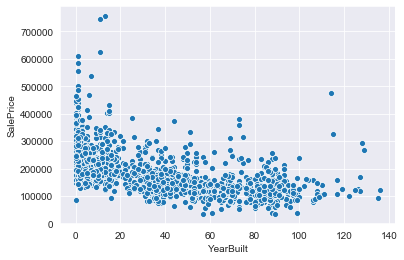

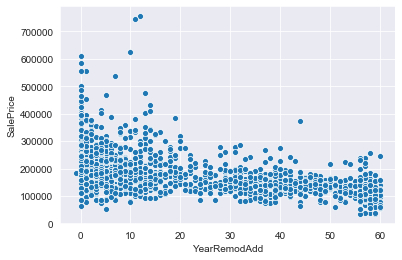

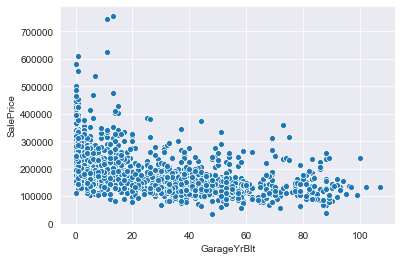

In [14]:
## Here we will compare the difference between All years feature with SalePrice
## We will capture the difference between year variable and year the house was sold for
df=df_train.copy()
for feature in set(year_features):
    if feature!='YrSold':
        df[feature]=df['YrSold']-df[feature]
        sns.scatterplot(data=df, x=feature, y="SalePrice")
        plt.show()

#### **Plot the the relationship between each discrite feature and the target feature SalesPrice**

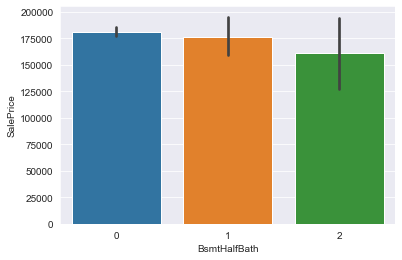

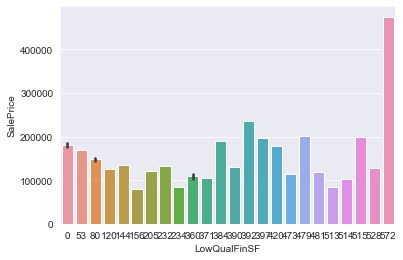

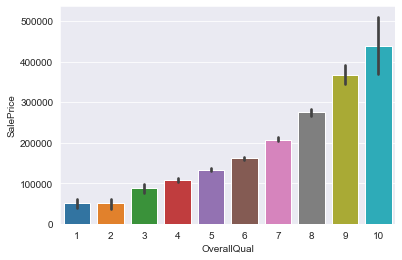

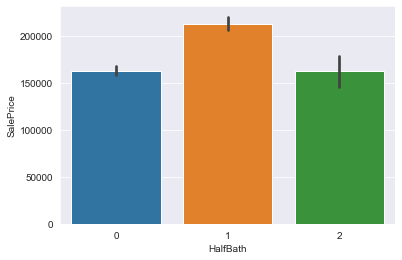

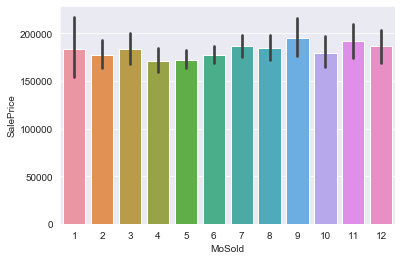

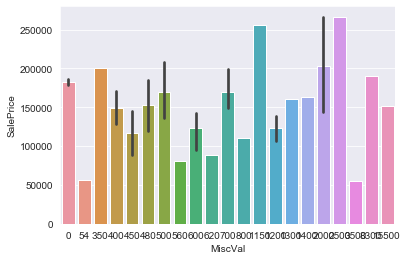

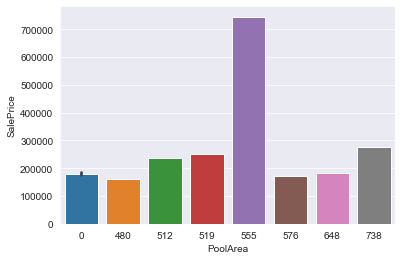

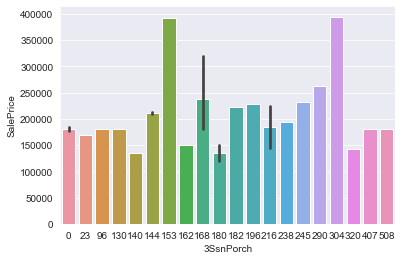

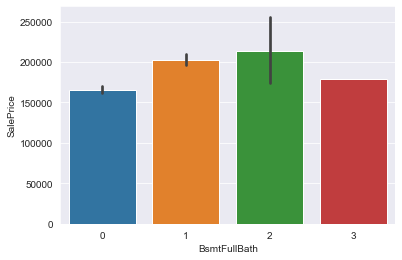

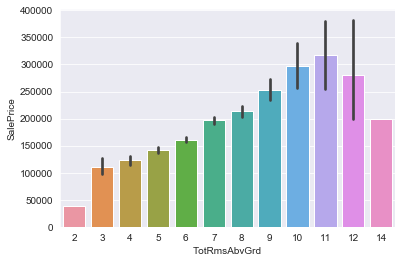

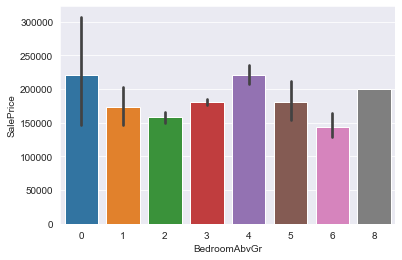

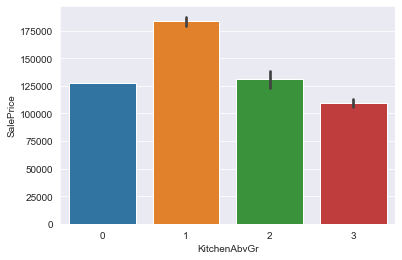

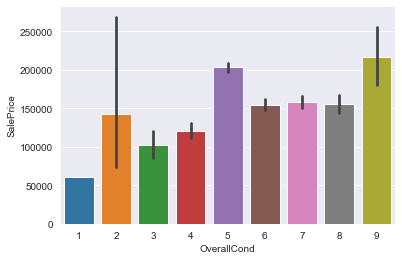

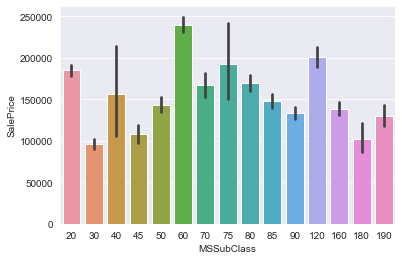

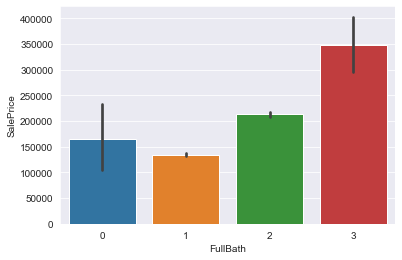

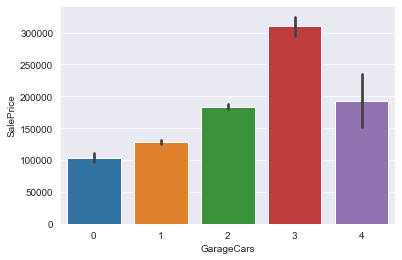

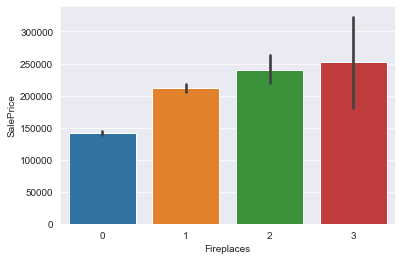

In [15]:
for feature in discrete_features: 
    if feature not in year_features+['Id']:
        sns.barplot(x=feature, y='SalePrice', data=df_train) 
        plt.show()

#### **Plot the the relationship between each continuous feature and the target feature SalesPrice**

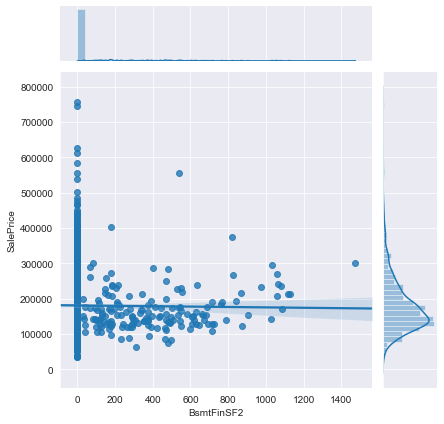

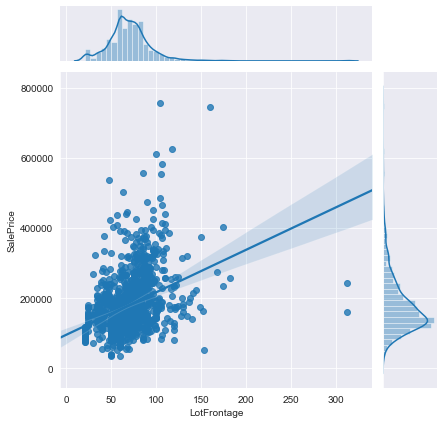

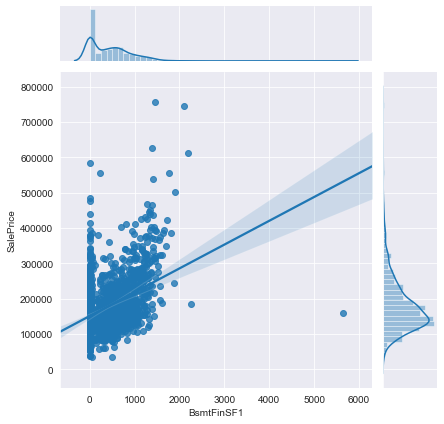

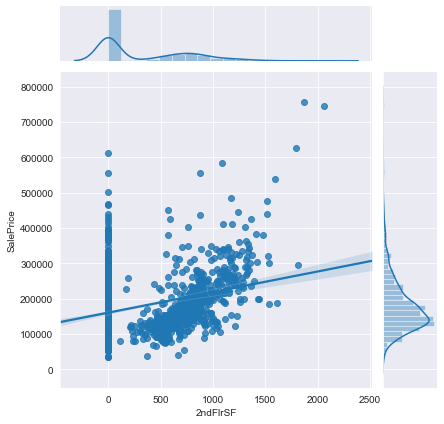

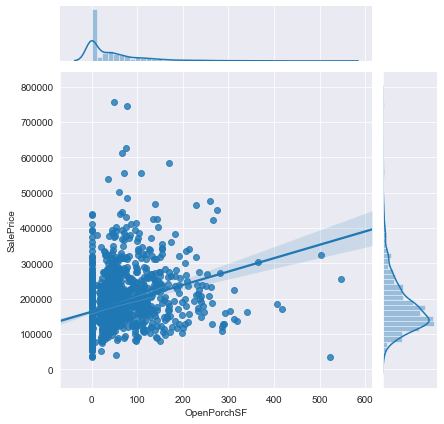

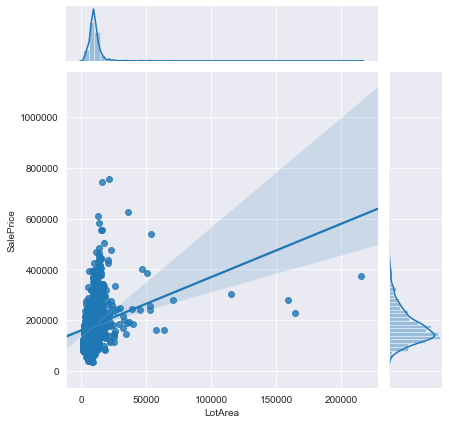

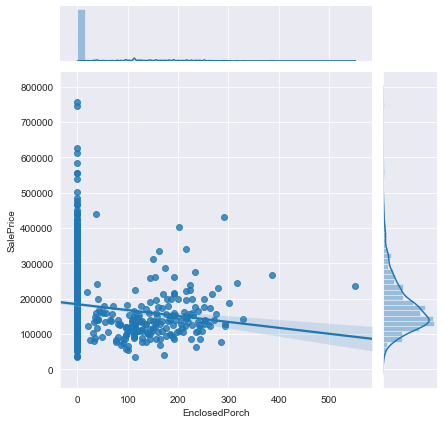

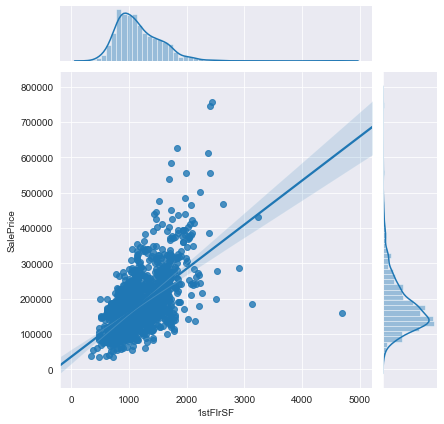

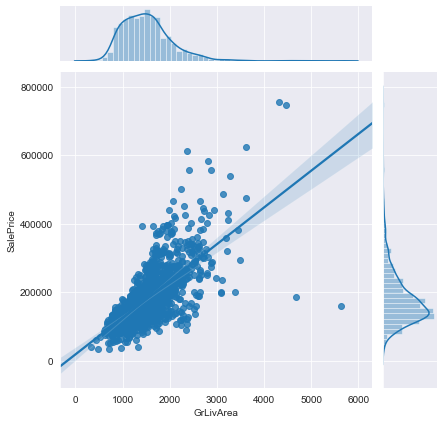

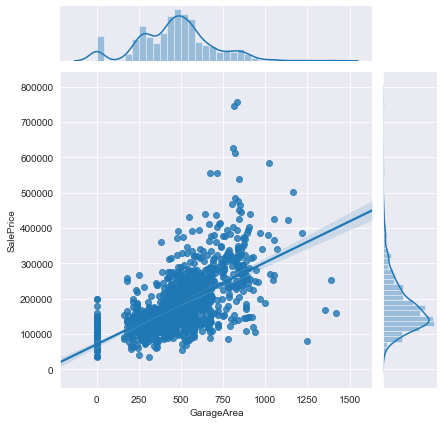

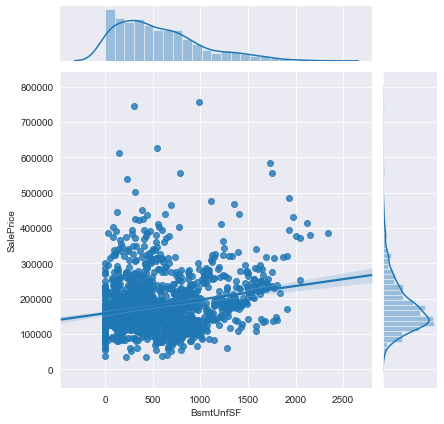

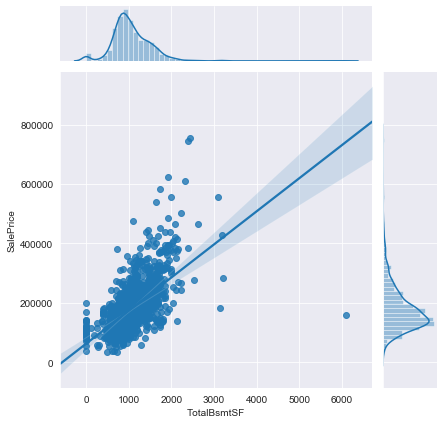

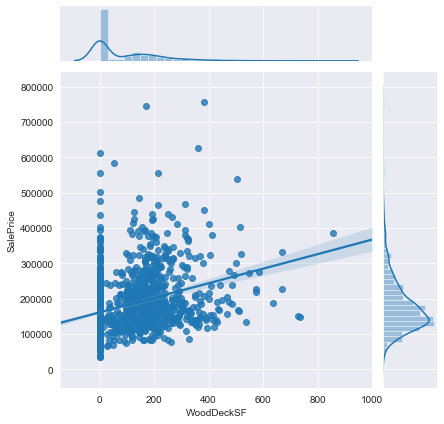

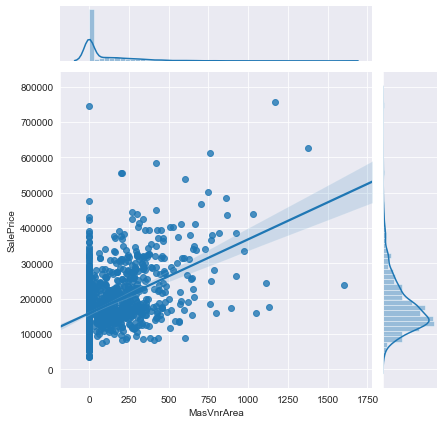

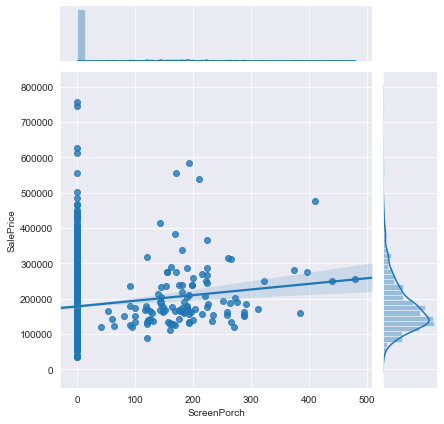

In [16]:
for feature in continuous_features:
    sns.jointplot(x=feature, y="SalePrice", data=df_train, kind="reg");  #GrLivArea GarageArea TotalBsmtSF 1stFlrSF YearBuilt YearRemodAdd
    plt.show()

### Categorical Features

#### **Finding the name and description of categorical features**

In [17]:
catgorical_features=df_train.select_dtypes(include=['O']).columns.values
len(catgorical_features)

43

In [18]:
df_train.describe(include=['object']).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


#### **Find the number of categories for each categorical feature**

In [19]:
for feature in catgorical_features:
    print(feature,len(df_train[feature].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


These categories must be indexed in the feature engineering process to be able to handled by models.

#### **Plot the the relationship between each categorical feature and the target feature SalesPrice**

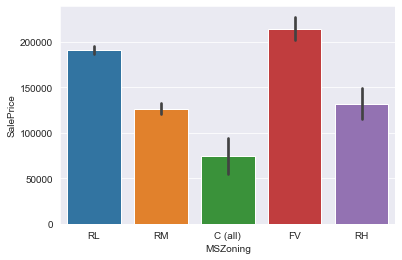

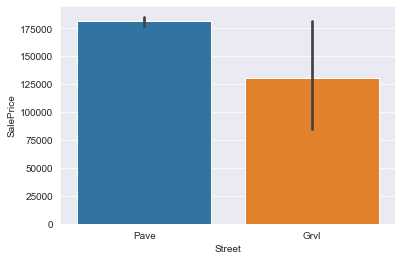

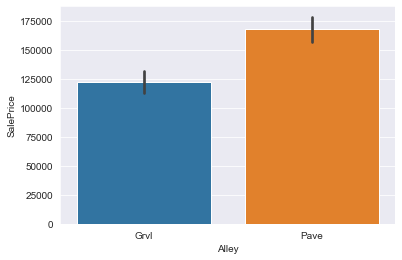

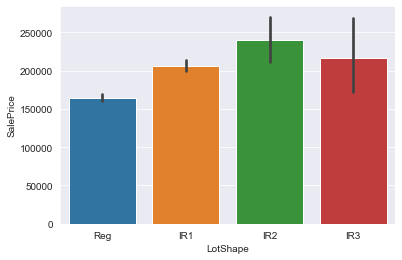

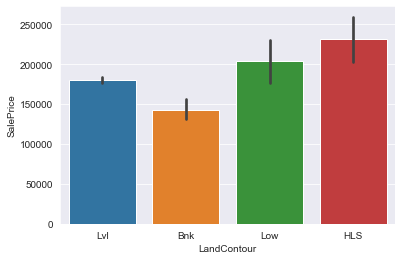

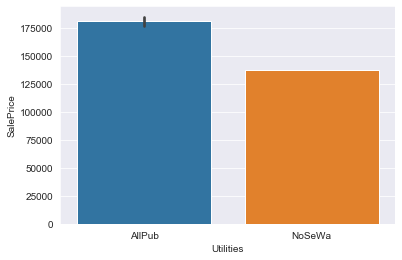

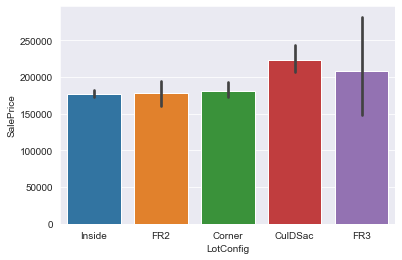

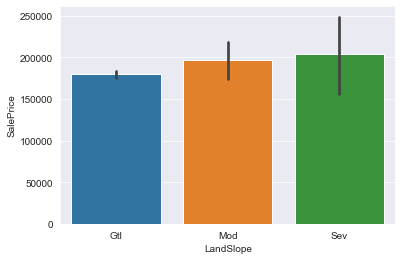

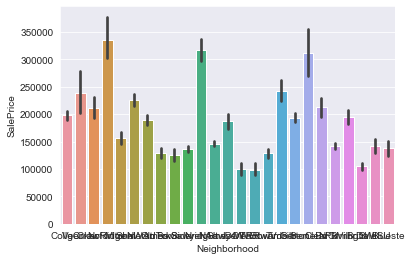

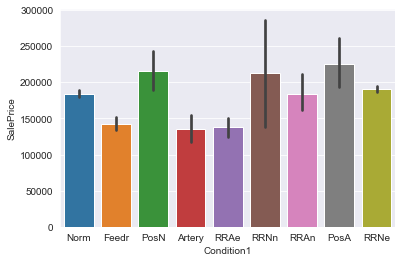

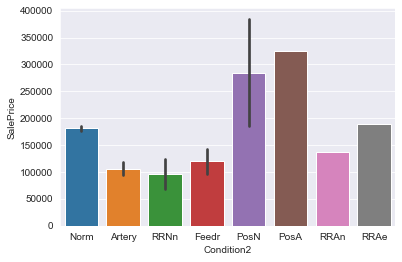

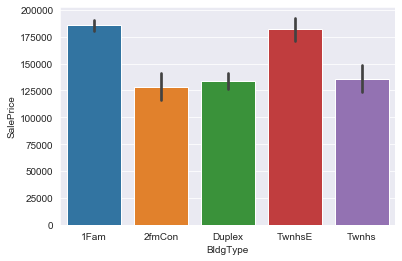

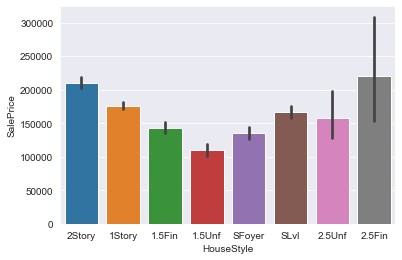

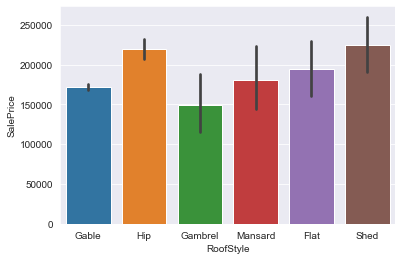

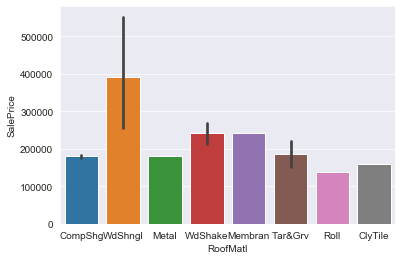

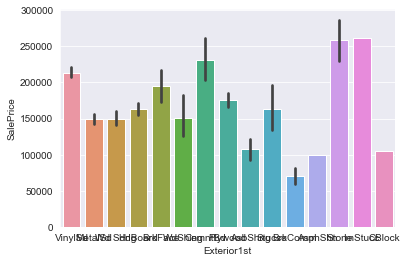

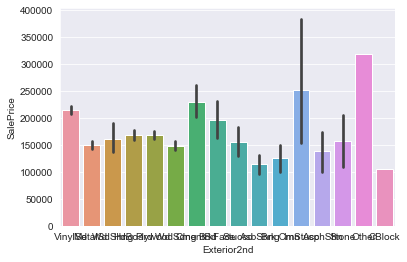

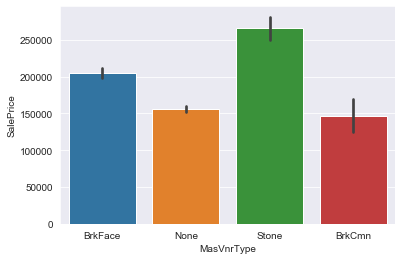

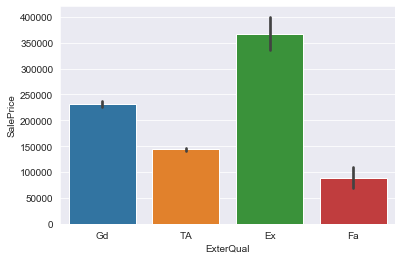

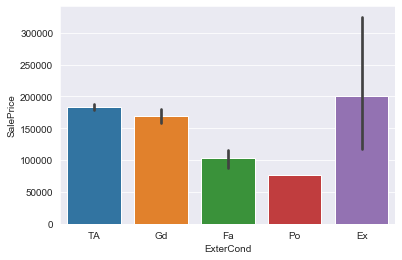

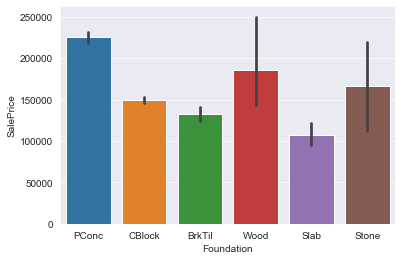

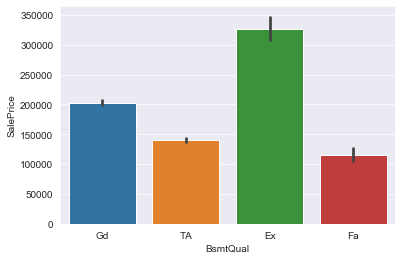

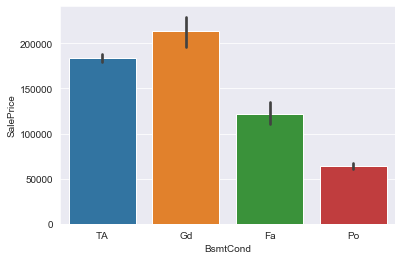

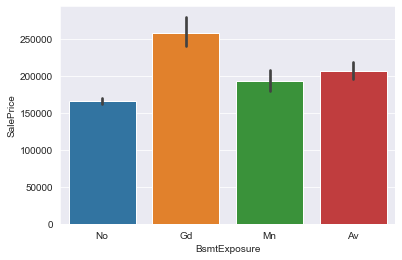

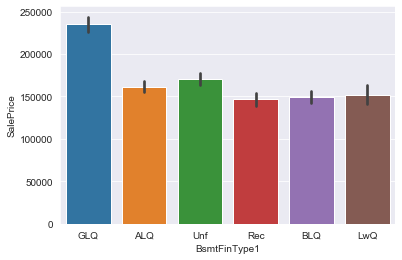

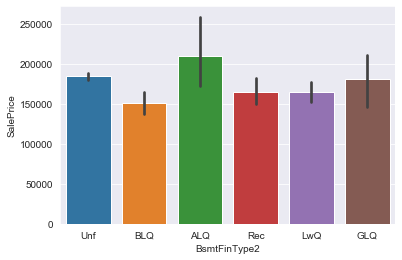

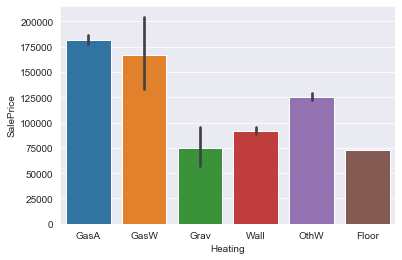

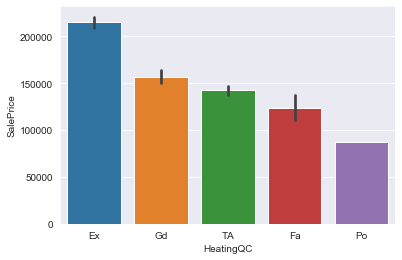

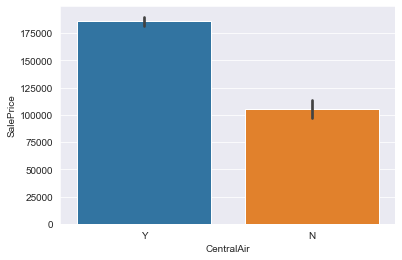

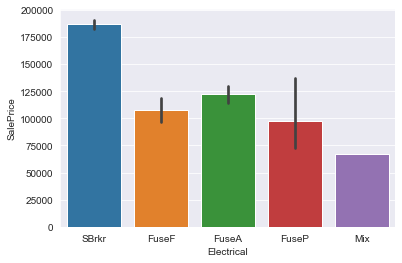

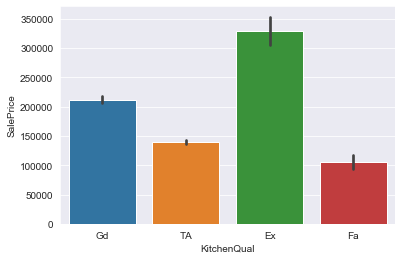

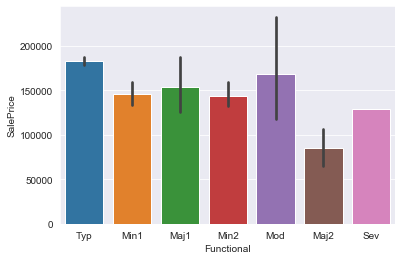

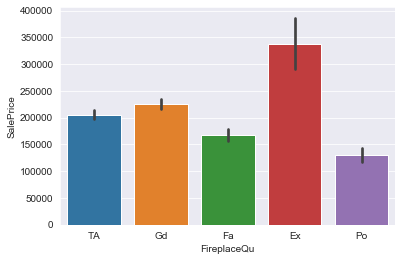

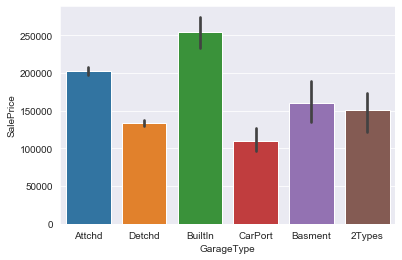

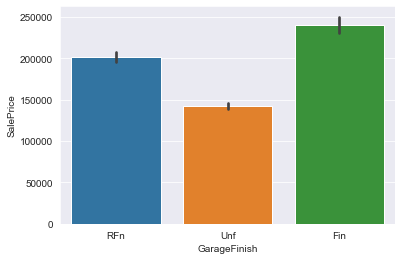

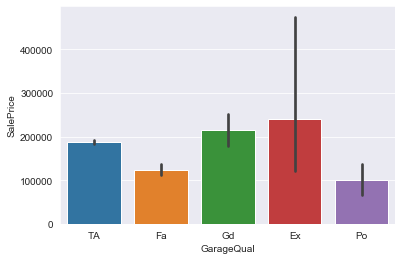

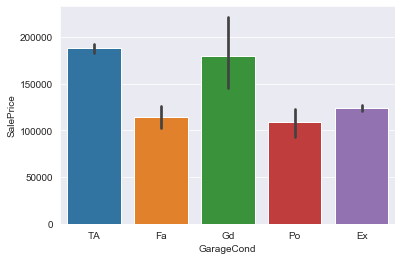

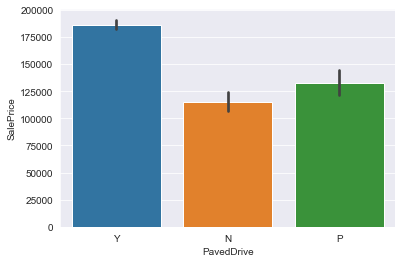

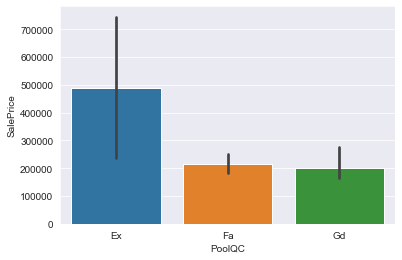

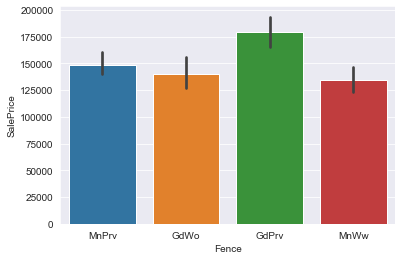

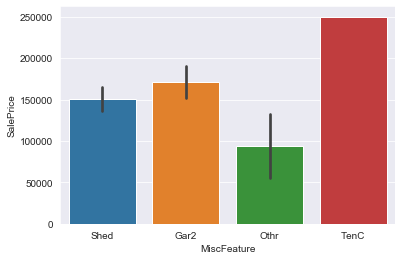

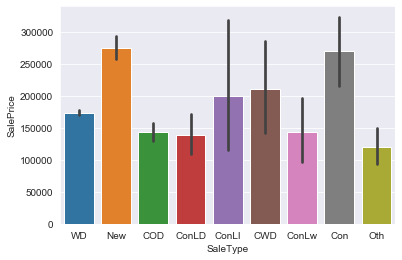

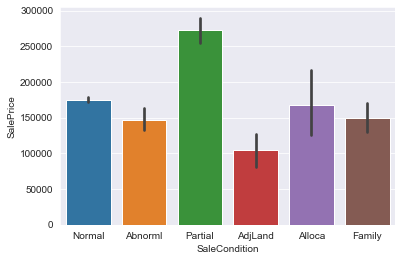

In [20]:
for feature in catgorical_features:
    sns.barplot(x=feature, y='SalePrice', data=df_train) 
    plt.show()

## Missing Values

#Let's check if the data set has any missing values. 


In [21]:
nan_numbers=df_train[numerical_features].isna().sum()    # can individually analyzed for [numerical_features],continuous_features, discrete_features or categorical ones
features_with_nan=nan_numbers[nan_numbers!=0]
features_with_nan.sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [22]:
features_with_nan=(features_with_nan/len(df_train)*100).sort_values(ascending=False)
features_with_nan

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

## Outliers
Discovering of the outliers canbe done using visualization tools like Box plot / scatter plots
or using z score / the IQR interquantile range

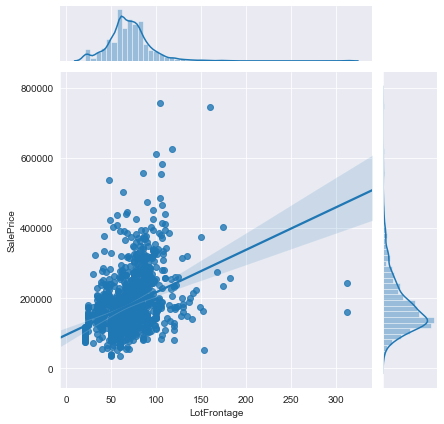

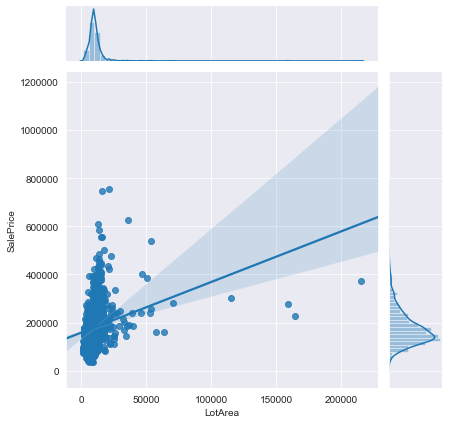

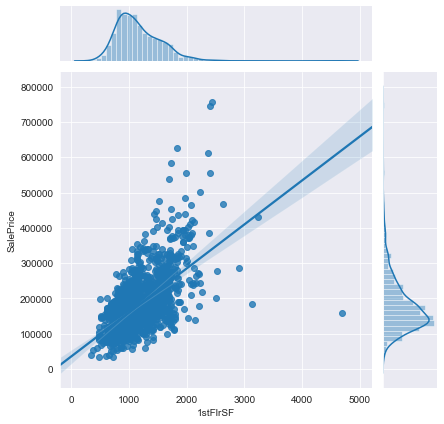

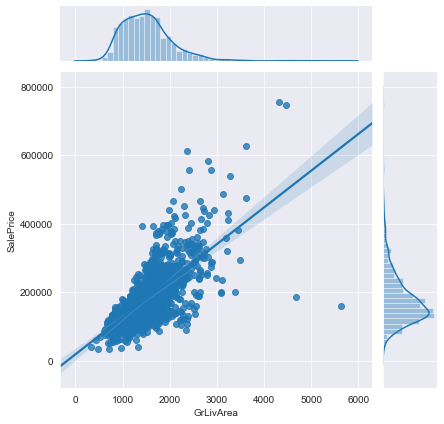

In [23]:
df=df_train.copy()
for feature in continuous_features:
    if 0 in df[feature].unique() or feature == 'SalePrice':
        pass
    else:
#         sns.boxplot(x=feature,data=df,orient='v')   
        sns.jointplot(x=feature, y= 'SalePrice',data=df, kind="reg") 
        plt.show()

It seem that considering outiers with respect to target feature SalePrice and removimg them individually is a better idea in this case study.

## Find Correlation

In [24]:
# Correlation
df_train_corr = df_train.corr()
df_train_corr

# SalePrice has highest corr with OverallQual
df_train_corr[['SalePrice']].sort_values(by='SalePrice',ascending=False).style.background_gradient(cmap='viridis', axis=None)

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


## Find Top 50% Corralated features with SalePrice

In [25]:
top_correlated_features=df_train_corr[df_train_corr['SalePrice']>0.5]['SalePrice'].sort_values(ascending=False)
top_correlated_features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

# Feature Engineering, Cleaning, and Imputation

## Imputing Missing values:

### Numerical Features having Nan values

In [26]:
numerical_features_nan=[feature for feature in numerical_features if df_train[feature].isnull().sum()!=0]
numerical_features_nan

['GarageYrBlt', 'MasVnrArea', 'LotFrontage']

#### LotFrontage

**LotFrontage** is Linear feet of street connected to property so  we can group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood.

In [27]:
df_train['LotFrontage'] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#### GarageYrBlt
**GarageYrBlt** in some cases is equal to each of YrSold, YearRemodAdd, or  YearBuilt.
we can find the ratios of these occurs and fill the non-values randomly with respect to these ratios.

In [28]:
import random
ratio={}
df=df_train[year_features].copy()

def fill(x):
    if np.isnan(x['GarageYrBlt']):
        rand_col= np.random.choice(vals, 1, replace=True, p=selection_probs)
#         print(rand_col)
        return int(x[rand_col])
    else:
        return int(x['GarageYrBlt'])
    
for feature in set(year_features):
    if feature!= 'GarageYrBlt':
        df[feature+'==GarageYrBlt']=df['GarageYrBlt']==df[feature]
        ratio[feature]=df[feature+'==GarageYrBlt'].sum()/len(df['GarageYrBlt'])
        
vals=[i for i in ratio]
probs=[ratio[i] for i in ratio]
selection_probs = [p/sum(probs) for p in probs]

df['GarageYrBlt_NAN'] = df['GarageYrBlt'].apply(lambda x: 1 if np.isnan(x) else 0)
df['GarageYrBlt'] = df.apply(lambda x:  fill(x),axis=1)

df_train['GarageYrBlt']=df['GarageYrBlt']

df[df['GarageYrBlt_NAN']==1].head(5)


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt==GarageYrBlt,YrSold==GarageYrBlt,YearRemodAdd==GarageYrBlt,GarageYrBlt_NAN
39,1955,1955,1955,2008,False,False,False,1
48,1920,2008,1920,2009,False,False,False,1
78,1968,1968,1968,2010,False,False,False,1
88,1915,1982,1915,2009,False,False,False,1
89,1994,1995,1994,2007,False,False,False,1


#### MasVnrArea
**MasVnrArea:** Masonry veneer area in square feet

Since the nan numbers are not very high, we fill them by median of other values

In [29]:
median_value=df_train['MasVnrArea'].median()
df_train['MasVnrArea'].fillna(median_value,inplace=True)

This process is done for every other nan feature(if available)

In [30]:
df_train[numerical_features_nan].isnull().sum()

GarageYrBlt    0
MasVnrArea     0
LotFrontage    0
dtype: int64

### Categorical Features having Nan values

In [31]:
## Replace missing value with a new label "NaN_Value"
catgorical_features_nan=[feature for feature in catgorical_features if df_train[feature].isnull().sum()!=0]

for feature in catgorical_features_nan:
    df_train[feature]=df_train[feature].fillna('NaN_Value')
    
print(df_train[catgorical_features_nan].isnull().sum())
df_train.head()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN_Value,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN_Value,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN_Value,NaN_Value,NaN_Value,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN_Value,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN_Value,NaN_Value,NaN_Value,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN_Value,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN_Value,NaN_Value,NaN_Value,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN_Value,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN_Value,NaN_Value,NaN_Value,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN_Value,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN_Value,NaN_Value,NaN_Value,0,12,2008,WD,Normal,250000


## Handling Outliers

In [32]:
# df_in=df_train.copy()
# for feature in continuous_features:
#     if feature!= 'SalePrice':
#         q1 = df_in[feature].quantile(0.25)
#         q3 = df_in[feature].quantile(0.75)
#         iqr = q3-q1 #Interquartile range
#         fence_low  = q1-1.5*iqr
#         fence_high = q3+1.5*iqr
#         df_in = df_in.loc[(df_in[feature] > fence_low) & (df_in[feature] < fence_high)]    
# df_in.head()

In [33]:
#Deleting outliers
# df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
# df_train.shape

## Creating new Year Features

Hereafter, year features are defined based on their with YrSold.

In [34]:
for feature in set(year_features):
    if feature != 'YrSold': 
        df_train[feature]=df_train['YrSold']-df_train[feature]
        
df_train[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5,2008
1,31,31,31,2007
2,7,6,7,2008
3,91,36,8,2006
4,8,8,8,2008


## Indexing Categorical  Features to Numerical values


In [35]:
from sklearn.preprocessing import OrdinalEncoder

df=df_train[catgorical_features].copy()

encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=100)

encoded_results = encoder.fit_transform(df)

df_train_encoded=pd.DataFrame(encoded_results, columns=catgorical_features)

df_train_encoded.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,6.0,1.0,0.0,1.0,5.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,3.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,3.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,6.0,1.0,0.0,1.0,5.0,3.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,3.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,6.0,1.0,0.0,1.0,5.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,3.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,3.0,3.0,4.0,0.0,4.0,1.0,4.0,0.0,6.0,1.0,2.0,1.0,5.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,3.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,6.0,1.0,0.0,1.0,5.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


Update df_train with the indexed values:

In [36]:
df_train[catgorical_features]=df_train_encoded.copy()
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,5,5,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,706,6.0,0,150,856,1.0,0.0,1.0,5.0,856,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,3.0,1.0,5,2.0,2,548,5.0,5.0,2.0,0,61,0,0,0,0,3.0,4.0,1.0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,31,31,1.0,1.0,8.0,8.0,3.0,0.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,978,6.0,0,284,1262,1.0,0.0,1.0,5.0,1262,0,0,1262,0,1,2,0,3,1,3.0,6,6.0,1,5.0,1.0,31,2.0,2,460,5.0,5.0,2.0,298,0,0,0,0,0,3.0,4.0,1.0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,7,6,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,486,6.0,0,434,920,1.0,0.0,1.0,5.0,920,866,0,1786,1,0,2,1,3,1,2.0,6,6.0,1,5.0,1.0,7,2.0,2,608,5.0,5.0,2.0,0,42,0,0,0,0,3.0,4.0,1.0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,91,36,1.0,1.0,13.0,15.0,3.0,0.0,3.0,4.0,0.0,4.0,1.0,4.0,0.0,216,6.0,0,540,756,1.0,2.0,1.0,5.0,961,756,0,1717,1,0,1,0,3,1,2.0,7,6.0,1,2.0,5.0,8,3.0,3,642,5.0,5.0,2.0,0,35,272,0,0,0,3.0,4.0,1.0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,8,8,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,655,6.0,0,490,1145,1.0,0.0,1.0,5.0,1145,1053,0,2198,1,0,2,1,4,1,2.0,9,6.0,1,5.0,1.0,8,2.0,3,836,5.0,5.0,2.0,192,84,0,0,0,0,3.0,4.0,1.0,0,12,2008,8.0,4.0,250000


## Scaling the values of the variables to the same range [0,1]

In [37]:
from sklearn.preprocessing import MinMaxScaler

df=df_train[df_train.columns[1:-1]]  # to drop Id and SalePrice

scalar = MinMaxScaler()
scaled_result=scalar.fit_transform(df)

scaled_features_df = pd.DataFrame(scaled_result, index=df.index, columns=df.columns)
scaled_features_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.150685,0.033420,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.036765,0.098361,0.2,0.142857,0.857143,0.866667,0.25,0.12250,0.666667,1.0,0.4,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.166667,0.046296,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.202055,0.038795,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.227941,0.524590,0.2,0.142857,0.571429,0.533333,0.75,0.00000,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.166667,0.287037,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.160959,0.046507,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.051471,0.114754,0.2,0.142857,0.857143,0.866667,0.25,0.10125,0.666667,1.0,0.4,0.5,1.00,0.50,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.166667,0.064815,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.133562,0.038561,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.669118,0.606557,0.2,0.142857,0.928571,1.000000,0.75,0.00000,1.000000,1.0,0.0,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.833333,0.074074,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.215753,0.060576,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.058824,0.147541,0.2,0.142857,0.857143,0.866667,0.25,0.21875,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.166667,0.074074,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,1.000000,0.50,1.0,0.8


Add on the Id and SalePrice Features:

In [38]:
df_train = pd.concat([df_train[['Id', 'SalePrice']].reset_index(drop=True), scaled_features_df], axis=1)
df_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,208500,0.235294,0.75,0.150685,0.033420,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.036765,0.098361,0.2,0.142857,0.857143,0.866667,0.25,0.12250,0.666667,1.0,0.4,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.166667,0.046296,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.50,1.0,0.8
1,2,181500,0.000000,0.75,0.202055,0.038795,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.227941,0.524590,0.2,0.142857,0.571429,0.533333,0.75,0.00000,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.166667,0.287037,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.363636,0.25,1.0,0.8
2,3,223500,0.235294,0.75,0.160959,0.046507,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.051471,0.114754,0.2,0.142857,0.857143,0.866667,0.25,0.10125,0.666667,1.0,0.4,0.5,1.00,0.50,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.166667,0.064815,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,0.50,1.0,0.8
3,4,140000,0.294118,0.75,0.133562,0.038561,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.669118,0.606557,0.2,0.142857,0.928571,1.000000,0.75,0.00000,1.000000,1.0,0.0,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.833333,0.074074,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.00,1.0,0.0
4,5,250000,0.235294,0.75,0.215753,0.060576,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.058824,0.147541,0.2,0.142857,0.857143,0.866667,0.25,0.21875,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.166667,0.074074,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,1.000000,0.50,1.0,0.8


## Scaling the target values:SalePrice
Submissions are evaluated on **Root-Mean-Squared-Error (RMSE)** between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Original distribution

mu = 180921.20 and sigma = 79415.29


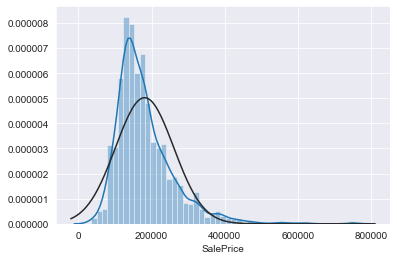

In [39]:
sns.distplot(df_train['SalePrice'] , fit = norm)
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

plt.show()

### Transformation

In [40]:
df['SalePrice']=np.log1p(df_train['SalePrice'])
# df_train['SalePrice']=np.log1p(df_train['SalePrice'])

### logarithm distribution

mu = 12.02 and sigma = 0.40


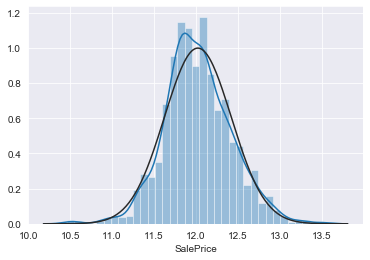

In [41]:
sns.distplot(df['SalePrice'] , fit = norm)
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

# Trasform Function for Test dataset

In [42]:
def prepare_dataset(dataset):
    numerical_features_nan=[feature for feature in numerical_features if dataset[feature].isnull().sum()!=0]
    dataset['LotFrontage'] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    dataset['GarageYrBlt'] = dataset.apply(lambda x:  fill(x),axis=1)
    for feature in numerical_features_nan:
        if feature!='LotFrontage' and feature !='GarageYrBlt':
            median_value=dataset[feature].median()
            dataset[feature].fillna(median_value,inplace=True)

    catgorical_features_nan=[feature for feature in catgorical_features if dataset[feature].isnull().sum()!=0]

    for feature in catgorical_features_nan:
        dataset[feature]=dataset[feature].fillna('NaN_Value')   

    for feature in set(year_features):
        if feature != 'YrSold': 
            dataset[feature]=dataset['YrSold']-dataset[feature]
            
    encoded_results = encoder.transform(dataset[catgorical_features])
    dataset_encoded=pd.DataFrame(encoded_results, columns=catgorical_features)    
    dataset[catgorical_features]=dataset_encoded.copy()
        
    
    df=dataset[dataset.columns[1:]]
    scaled_result=scalar.transform(df)
    scaled_features_df = pd.DataFrame(scaled_result, index=df.index, columns=df.columns)
    dataset = pd.concat([dataset[['Id']].reset_index(drop=True), scaled_features_df], axis=1)
    return dataset


df_test=prepare_dataset(df_test)
print(df_test.shape)
df_test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0.000000,0.50,0.202055,0.048246,1.0,0.5,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.285714,0.0,0.285714,0.444444,0.625,0.360294,0.819672,0.2,0.142857,0.857143,0.866667,0.75,0.0000,1.000000,1.0,0.2,1.0,1.0,1.0,0.833333,0.082920,0.5,0.097693,0.115582,0.144354,0.2,1.0,1.0,1.0,0.128958,0.000000,0.0,0.105878,0.0,0.0,0.333333,0.0,0.250,0.333333,1.000000,0.250000,1.0,0.000000,0.6,0.166667,0.453704,1.000000,0.25,0.514810,1.0,1.0,1.0,0.163361,0.000000,0.0,0.0,0.25,0.0,1.0,0.5,0.25,0.000000,0.454545,1.0,1.0,0.8
1,1462,0.000000,0.75,0.205479,0.060609,1.0,0.5,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.285714,0.0,0.285714,0.555556,0.625,0.382353,0.868852,0.6,0.142857,0.928571,0.933333,0.25,0.0675,1.000000,1.0,0.2,1.0,1.0,1.0,0.000000,0.163536,1.0,0.000000,0.173801,0.217512,0.2,1.0,1.0,1.0,0.228316,0.000000,0.0,0.187453,0.0,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.6,0.166667,0.481481,1.000000,0.25,0.220028,1.0,1.0,1.0,0.458576,0.065814,0.0,0.0,0.00,0.0,1.0,1.0,0.00,0.806452,0.454545,1.0,1.0,0.8
2,1463,0.235294,0.75,0.181507,0.058566,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.285714,0.0,0.714286,0.444444,0.500,0.095588,0.213115,0.2,0.142857,0.857143,0.866667,0.75,0.0000,1.000000,1.0,0.4,0.5,1.0,1.0,0.333333,0.140149,1.0,0.000000,0.058647,0.151882,0.2,0.5,1.0,1.0,0.136301,0.339467,0.0,0.243971,0.0,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.166667,0.120370,0.000000,0.50,0.339915,1.0,1.0,1.0,0.247375,0.062157,0.0,0.0,0.00,0.0,1.0,0.5,0.25,0.000000,0.181818,1.0,1.0,0.8
3,1464,0.235294,0.75,0.195205,0.040562,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.285714,0.0,0.714286,0.555556,0.625,0.088235,0.213115,0.2,0.142857,0.857143,0.866667,0.25,0.0125,1.000000,1.0,0.4,1.0,1.0,1.0,0.333333,0.106662,1.0,0.000000,0.138699,0.151555,0.2,0.0,1.0,1.0,0.135842,0.328329,0.0,0.239261,0.0,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.166667,0.111111,0.000000,0.50,0.331453,1.0,1.0,1.0,0.420070,0.065814,0.0,0.0,0.00,0.0,1.0,1.0,0.25,0.000000,0.454545,1.0,1.0,0.8
4,1465,0.588235,0.75,0.075342,0.017318,1.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.285714,1.0,0.285714,0.777778,0.500,0.132353,0.311475,0.2,0.142857,0.428571,0.400000,0.75,0.0000,0.666667,1.0,0.4,0.5,1.0,1.0,0.000000,0.046598,1.0,0.000000,0.435360,0.209493,0.2,0.0,1.0,1.0,0.217072,0.000000,0.0,0.178222,0.0,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.000000,0.6,0.166667,0.166667,0.666667,0.50,0.356841,1.0,1.0,1.0,0.000000,0.149909,0.0,0.0,0.30,0.0,1.0,1.0,0.25,0.000000,0.000000,1.0,1.0,0.8


# Save Prepared DataFrames

In [43]:
df_train.to_csv("./output/train_modified.csv",index=False)
df_test.to_csv("./output/test_modified.csv",index=False)
print("Mission was done!!!")

Mission was done!!!


# References:

Thanks to Kaggle Contributor Krish C Naik https://www.kaggle.com/krishnaik06